In [148]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import entropy as cluster_entropy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
sizes3 = pd.read_csv("sizes3 (with class label).csv")
sizes3

,x,y,class
0,9.285310,14.587900,0
1,12.397700,8.448900,0
2,8.736240,11.680300,0
3,9.101970,12.832700,0
4,12.294800,8.673730,0
...,...,...,...
995,0.951624,1.631500,3
996,1.421170,-0.673289,3
997,1.475480,-2.454380,3
998,-0.633825,0.591556,3


In [150]:
sizes3.apply(lambda x:np.sum(x==' '))

x        0
y        0
class    0
dtype: int64

In [151]:
X = sizes3.drop(labels=['class'],axis=1)
sizes3_class = sizes3['class'].values

In [152]:
X

,x,y
0,9.285310,14.587900
1,12.397700,8.448900
2,8.736240,11.680300
3,9.101970,12.832700
4,12.294800,8.673730
...,...,...
995,0.951624,1.631500
996,1.421170,-0.673289
997,1.475480,-2.454380
998,-0.633825,0.591556


In [153]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
x_scaled = scaler.transform(X)
X = pd.DataFrame(x_scaled,columns=X.columns)
X

,x,y
0,0.691773,0.908751
1,0.835630,0.638735
2,0.666394,0.780864
3,0.683299,0.831551
4,0.830874,0.648624
...,...,...
995,0.306583,0.338880
996,0.328286,0.237506
997,0.330796,0.159167
998,0.233303,0.293139


In [154]:
start = time.time()
Agg = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
y_pred = Agg.fit_predict(X)
end = time.time()
print('運行時間 =',end-start)

運行時間 = 0.037320852279663086


In [155]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [156]:
y_pred = np.array([1 if label == 2 else 2 if label == 3 else 3 if label == 1  else 0 for label in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

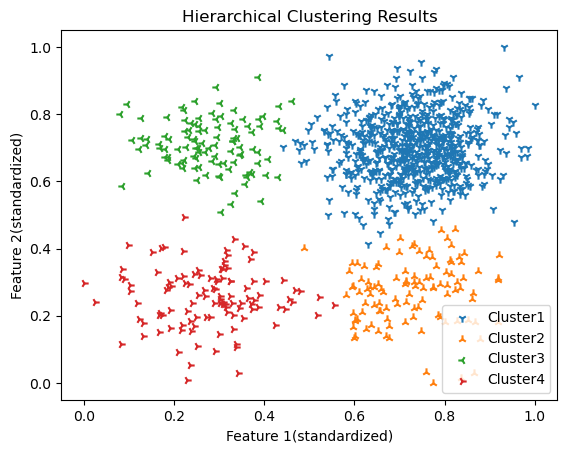

In [168]:
X['class'] = sizes3_class
X['cluster'] = y_pred
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1(standardized)')
plt.ylabel('Feature 2(standardized)')
plt.scatter(X[X['cluster'] == 0]['x'], X[X['cluster'] == 0]['y'], marker='1', label='Cluster1')
plt.scatter(X[X['cluster'] == 1]['x'], X[X['cluster'] == 1]['y'], marker='2', label='Cluster2')
plt.scatter(X[X['cluster'] == 2]['x'], X[X['cluster'] == 2]['y'], marker='3', label='Cluster3')
plt.scatter(X[X['cluster'] == 3]['x'], X[X['cluster'] == 3]['y'], marker='4', label='Cluster4')
plt.legend(loc='lower right')
plt.show()

In [158]:
cluster_centers = np.array([X[y_pred == i].mean(axis=0) for i in range(1,5)])
distances_squared = np.sum((X - cluster_centers[y_pred-1]) ** 2, axis=1)
sse = np.sum(distances_squared)
print('SSE =',sse)

SSE = 24.19103326720689


In [159]:
acc = accuracy_score(sizes3_class, y_pred)
print('Accuracy =',acc)

Accuracy = 0.987


In [160]:
entropy = cluster_entropy(y_pred)
print('Entropy =',entropy)

Entropy = 0.9966019918481364
